<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.1-RNA/blob/main/Atividade_2_1_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Criando o diretório no Google Drive**

# Detalhamento da Atividade

In [ ]:
x = 12%4
print(x)

0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics
import unicodedata
import io

In [ ]:
!git clone https://github.com/AllanHigorLP/Atividade_avaliativa-2.1-RNA/

fatal: destination path 'Atividade_avaliativa-2.1-RNA' already exists and is not an empty directory.


In [ ]:
df = np.fromfile('/content/Atividade_avaliativa-2.1-RNA/data/dataAll.txt')
print(df)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


In [ ]:
df.shape

(3000,)

In [ ]:
df = df.reshape(1000, 3)
print(df)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


# Parte I – Resolvendo um Problema Linearmente Separável

In [ ]:
# n (taxa de aprendizado)
theta = 0.0
n = 0.1
bias = 1.0
weight_max = 0.5
weight_min = -0.5


In [ ]:
weight = np.random.uniform(weight_min, weight_max, size=3)
weight = np.round(weight,4)
print(weight)

[0.1385 0.0061 0.014 ]


In [ ]:
epoca = 0
erros = 1
ajustes_total = 0
ajustes_epoca = 0

def soma_ponderada():
    sum_pond = (weight[0]*(-1*bias)) + (weight[1]*example[0]) + (weight[2]*example[1])
    return sum_pond 

def funcao_ativacao():
    if u >= theta:
        return 1.0
    else:
        return 0.0

def novo_peso(w, fu_ac):
    e = example[2] - fu_ac
    novo_p = w + (n*e*np.array([(-1*bias), example[0], example[1]]))
    novo_p = np.round(novo_p,4)
    return novo_p
    
while (erros != 0):
    epoca = epoca + 1
    ajustes_epoca = 0
    erros = 0
    
    for example in df:
        funct_act = 0.0
        u = 0.0
        u = soma_ponderada()
        funct_act = funcao_ativacao()
        
        if funct_act != example[2]:
            ajustes_epoca = ajustes_epoca + 1
            ajustes_total = ajustes_total + 1
            erros = 1
            weight = novo_peso(weight, funct_act)
            print("Novo vetor de pesos ajustado", weight, "\n")
            
    print("Qtd de ajustes do vetor de pesos na época", epoca, ":", ajustes_epoca, "\n")
    
print("\nVetor de pesos final (ajustado): ", weight)
print("Número total de ajustes do vetor de pesos:", ajustes_total)
print("Número total de epocas:", epoca)

Novo vetor de pesos ajustado [  0.2385  36.3849 -24.4002] 

Novo vetor de pesos ajustado [   0.3385  -17.2742 -100.896 ] 

Novo vetor de pesos ajustado [  0.2385  55.5218 -65.0664] 

Novo vetor de pesos ajustado [  0.1385 138.1205  14.7894] 

Novo vetor de pesos ajustado [  0.2385 143.9663 -63.5052] 

Novo vetor de pesos ajustado [   0.3385  103.9574 -141.3979] 

Novo vetor de pesos ajustado [  0.4385 157.6272 -92.3056] 

Novo vetor de pesos ajustado [   0.3385  104.6671 -149.1751] 

Novo vetor de pesos ajustado [  0.4385 164.2266 -99.0528] 

Novo vetor de pesos ajustado [   0.3385  118.702  -164.6887] 

Novo vetor de pesos ajustado [  0.4385 209.4179 -89.9754] 

Novo vetor de pesos ajustado [   0.3385  151.6369 -150.2836] 

Novo vetor de pesos ajustado [   0.2385  103.3703 -198.7533] 

Novo vetor de pesos ajustado [ 1.385000e-01  1.738177e+02 -1.566370e+02] 

Novo vetor de pesos ajustado [ 3.850000e-02  1.269757e+02 -2.080469e+02] 

Novo vetor de pesos ajustado [-6.150000e-02  1.96839

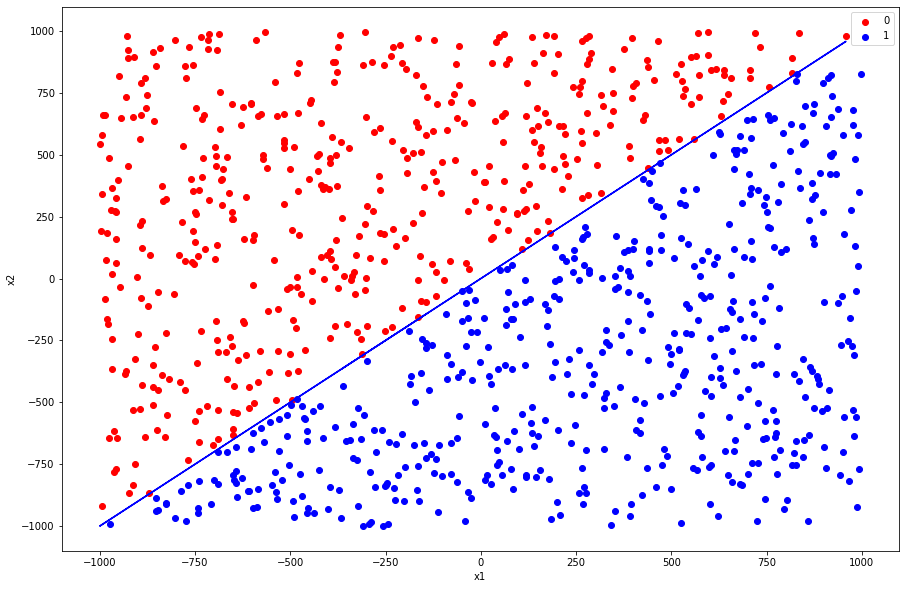

In [ ]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []

for example in df:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

slp = -(weight[0]/weight[2]) / (weight[0]/weight[1])
end = (weight[0]/weight[2])

abline_values = [slp * i + end for i in x_classe0]
plt.plot(x_classe0, abline_values, 'b',)

plt.show()

#Parte II – Executando


In [ ]:
df0 = np.fromfile('/content/Atividade_avaliativa-2.1-RNA/data/df0.txt')
print(df0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


In [ ]:
df0.shape

(1800,)

In [ ]:
df0 = df0.reshape(600, 3)
print(df0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


In [ ]:
import numpy as np

class Perceptron(object):
    
   def __init__(self, no_of_inputs, epoch=100, 
                    learning_rate=np.random.uniform(0.1, 0.4, 1), 
                    baias=-1, 
                    random_train_set=False, 
                    show_training=False,
                    weights=(-5.0, 0.5),
                    use_epoch=False):
        self.epoch = epoch
        self.learning_rate= learning_rate
        self.weights = np.random.uniform(weights[0], 
                                            weights[1], 
                                            no_of_inputs + 1)
        self.baias = baias
        self.random_train_set = random_train_set
        self.show_training = show_training
        self.use_epoch = use_epoch
    
   def __add_baias(self, inputs):
        new_inputs = []
        for row in inputs:
            new_row = np.insert(row, 0, self.baias)
            new_inputs.append(new_row)
        return np.array(new_inputs)

   def __weight_adjust(self, x_train, y_predicto, y_real):
        erro = y_predicto - y_real
        self.weights -= self.learning_rate * erro * x_train
        self.weights = np.round(self.weights, 4)

   def __activ_func(self, u): 
        if u >= 0.0:
            return 1.0
        else:
            return 0.0

   def __error(self, y_predicto, y_real):
        if y_predicto != y_real:
            return True
        else:
            return False

   def __random_sets(self, x_train, y_train):
        # Randomizando os dados de treino
        index = np.arange(len(x_train))
        np.random.shuffle(index)
        x_train = x_train[index]
        y_train = y_train[index]
        return x_train, y_train
        #---------------------------------
    
   def predict(self, x_test):
        x_test = self.__add_baias(x_test)
        y_predicto = []
        for _x_test in x_test:
            u = np.sum(np.dot(_x_test, self.weights))
            y = self.__activ_func(u)
            y_predicto.append(y)
        return np.array(y_predicto)

   def __show_training(self, epoch, count_adjust):
        print("\n\tÉpoca:", epoch)
        print("Pesos:", self.weights)
        print("Quantidade de Ajustes:", count_adjust)

   def __learning(self, x_train, y_train, no_erro):
        count_adjust = 0
        for x, y in zip(x_train, y_train):
            u = np.sum(np.dot(x, self.weights))
            y_predicto = self.__activ_func(u)
            if self.__error(y_predicto, y):
                self.__weight_adjust(x, y_predicto, y)
                no_erro = False
                count_adjust += 1
        return no_erro, count_adjust


   def __epochs(self, x_train, y_train):
        no_erro = False
        epoch = 1
        total_adjust = 0
        while no_erro != True:

            if self.use_epoch:
                if epoch == self.epoch:
                    break
                
            if self.random_train_set:
                x_train, y_train = self.__random_sets(x_train,
                                                         y_train)
            
            no_erro = True
            
            no_erro, count_adjust = self.__learning(x_train, 
                                                        y_train,
                                                        no_erro)

            if self.show_training:
                self.__show_training(epoch, count_adjust)

            epoch += 1
            total_adjust += count_adjust
        return epoch, total_adjust


   def total_values(self, x_train, y_train):

        x_train = self.__add_baias(x_train)
        epoch, total_adjust = self.__epochs(x_train, y_train)
        
        print("\nQuantidade total de épocas:", epoch)
        print("Quantidade total de ajustes:", total_adjust)
        
        np.set_printoptions(precision=4, suppress=True)
        print("Vetor final de pesos:", np.round(self.weights, 4))
        return epoch, total_adjust

In [ ]:
weight_max_1 = 100
weight_min_1 = -100
weights_1 = np.random.uniform(weight_min_1, weight_max_1, size=3)
weights_1 = np.round(weights_1,4)
print("Peso 1: ", weights_1)
weight_max_2 = 0.5
weight_min_2 = -0.5
weights_2 = np.random.uniform(weight_min_2, weight_max_2, size=3)
weights_2 = np.round(weights_2,4)
print("Peso 2: ", weights_2)

Peso 1:  [ 33.4952  21.9268 -22.1216]
Peso 2:  [ 0.1012 -0.2351 -0.1508]


#Configuração 1
Valor da taxa de aprendizado: 0.4<br>
Peso: wi ∼ U(-100, +100)

In [ ]:
taxa_aprendizado = 0.4

In [89]:
epocas = []
ajustes = []

for i in range(1, 11):
    perceptron = Perceptron(no_of_inputs=2, learning_rate=taxa_aprendizado, weights=weights_1)
    treinamento_x = df0[:,[0,1]]
    treinamento_y = df0[:,2]    
    num_da_epoca, num_de_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, num_da_epoca)
    ajustes = np.append(ajustes, num_de_ajustes)    

epocas_1 = epocas
ajustes_1 = ajustes

def set_valores_media(var_media, values):
  var_media = np.mean(values)
  var_media = np.round(var_media,4)
  return var_media

def set_valores_desvio_padrao(var_desvio_padrao, values):
  var_desvio_padrao = np.std(values)
  var_desvio_padrao = np.round(var_desvio_padrao,4)
  return var_desvio_padrao

epocas_media_1 = set_valores_media(epocas_media_1, epocas)
ajustes_media_1 = set_valores_media(ajustes_media_1, ajustes)
epocas_desvio_padrao_1 = set_valores_desvio_padrao(epocas_desvio_padrao_1, epocas)
ajustes_desvio_padrao_1 = set_valores_desvio_padrao(ajustes_desvio_padrao_1, ajustes)

print(epocas_1)
print("Menor Epoca = ")
print("\nMedias: Epoca = ", epocas_media_1, "| Ajustes = ", ajustes_media_1, "\nDesvios Padrao: Epoca = ", epocas_desvio_padrao_1, "| Ajustes = ", ajustes_desvio_padrao_1)

[ 4.  6. 10. 10. 10. 18. 13.  9.  2.  5.]
Menor Epoca = 

Medias: Epoca =  8.7 | Ajustes =  153.4 
Desvios Padrao: Epoca =  4.4508 | Ajustes =  134.751


In [ ]:
weights = perceptron.weights
weights

array([ 15.0495, -17.2545,  43.8829])


Obtenção da reta solução a partir do último vetor de pesos encontrado

In [ ]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3429 -(-0.3932)*x1


Gráfico do conjunto de dados e a reta que separa as classes

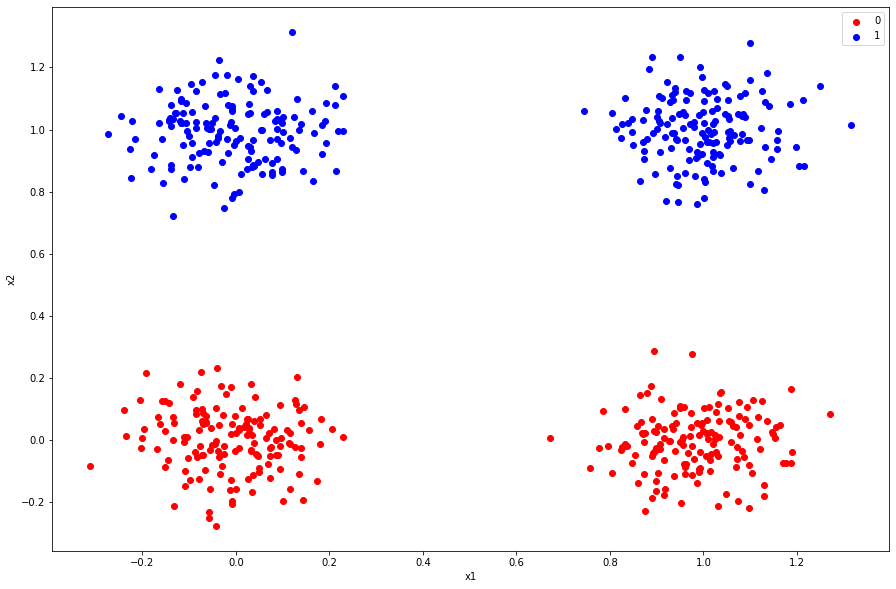

In [ ]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

# slp = -(weight[0]/weight[2]) / (weight[0]/weight[1])
# end = (weight[0]/weight[2])
#plt.axes.axline(0,10, slope=slp, color="black", lw=2)
plt.show()